In [9]:
import pandas as pd

In [10]:
#loading the data
train=pd.read_csv("./drive/MyDrive/TechAxis/datasets/mnist_train.csv")
test=pd.read_csv("./drive/MyDrive/TechAxis/datasets/mnist_test.csv")

In [11]:
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train=train['label']

x_train=train.drop(labels=['label'],axis=1)

In [13]:
y_train.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [14]:
#normalization
x_train = x_train/255.0
test=test/255.0

In [15]:
#reshape image in 3 dimensions (h=28px,w=28px,canal=1)
x_train = x_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [16]:
#encoe labels to one hot vectors (ex:2->[0,0,1,0,0,0,0,0,0,0])
from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1)

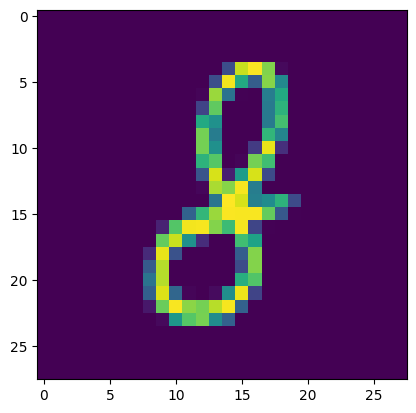

In [20]:
import matplotlib.pyplot as plt
g=plt.imshow(x_train[1][:,:,0])

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
from keras.optimizers import RMSprop

optimizer=RMSprop(learning_rate=0.001,rho=0.9,epsilon=1e-08,decay=0.0)


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [23]:
#compiling the model
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_val,y_val)
)

Epoch 1/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.7983 - loss: 0.5954 - val_accuracy: 0.9829 - val_loss: 0.0501
Epoch 2/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9751 - loss: 0.0825 - val_accuracy: 0.9871 - val_loss: 0.0384
Epoch 3/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9840 - loss: 0.0553 - val_accuracy: 0.9902 - val_loss: 0.0297
Epoch 4/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9869 - loss: 0.0416 - val_accuracy: 0.9879 - val_loss: 0.0388
Epoch 5/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9885 - loss: 0.0359 - val_accuracy: 0.9914 - val_loss: 0.0297


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


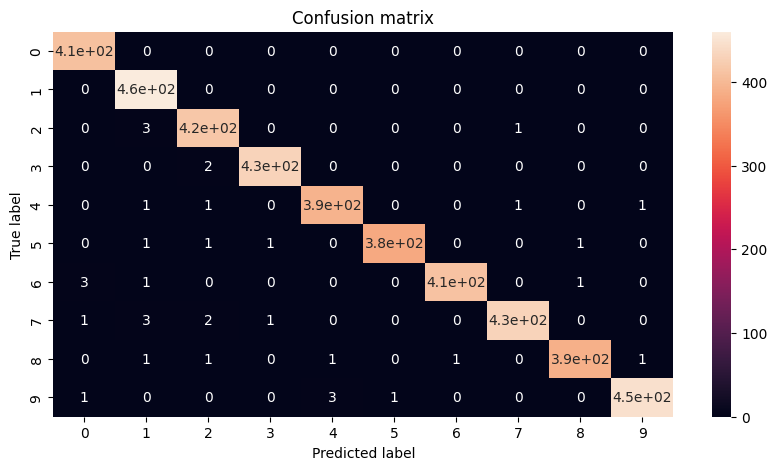

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
cm=confusion_matrix(y_true,y_pred_classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
plt.show()